In [11]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import normalize

In [12]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5220-A98C

 Directory of C:\Users\abc\OneDrive\Desktop\excelr\Assignments\clustering

31/08/2022  17:35    <DIR>          .
31/08/2022  17:35    <DIR>          ..
31/08/2022  17:29    <DIR>          .ipynb_checkpoints
31/08/2022  17:35            17,332 clustering_assignment_8_nihalinamdar.ipynb
31/08/2022  17:27            80,754 clustering_assignment_8_q2_nihalinamdar.ipynb
31/08/2022  16:42             1,328 crime_data.csv
31/08/2022  17:35           157,167 EastWestAirlines.csv
31/08/2022  17:33           245,660 EastWestAirlines.xlsx
31/08/2022  16:42             1,560 Problem_Statement(Airlines).txt
31/08/2022  16:42               389 ProblemSatement(crime_data).txt
               7 File(s)        504,190 bytes
               3 Dir(s)  20,568,326,144 bytes free


In [13]:
airline=pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [14]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [22]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


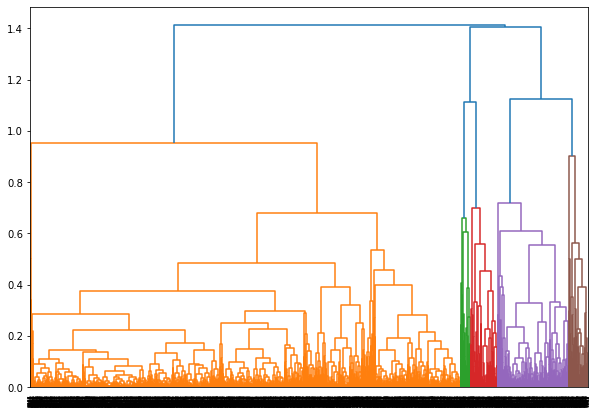

In [24]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))

In [30]:
hc=AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage= 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [37]:
y=pd.DataFrame(hc.fit_predict(airline2_norm),columns=['clustersid'])
y

,clustersid
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [38]:
y['clustersid'].value_counts()

0    3086
1     509
3     197
2     137
4      70
Name: clustersid, dtype: int64

In [32]:
airline2['clustersid']=hc.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [33]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,85958.186325,163.835386,1.876215,1.012638,1.002916,13503.547959,11.000648,469.272197,1.402787,4043.470836,0.301685
1,1,49938.428291,109.797642,3.418468,1.031434,1.049116,40242.673870,18.194499,584.611002,1.722986,4072.086444,0.717092
2,2,15395.744526,93.620438,3.189781,1.021898,1.109489,44896.007299,17.065693,560.094891,1.708029,4517.262774,1.000000
3,3,7222.208122,10.177665,1.005076,1.000000,1.000000,1067.822335,3.395939,72.786802,0.213198,4885.304569,0.182741
4,4,1629.914286,0.000000,1.014286,1.000000,1.000000,652.228571,2.571429,42.142857,0.157143,4828.657143,0.171429


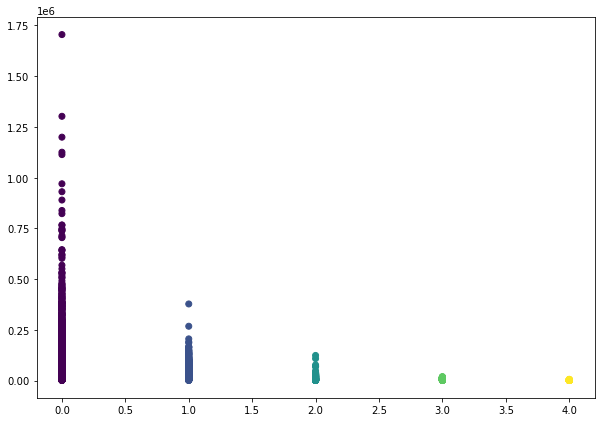

In [35]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hc.labels_) 